# Example: ITKStrain with Numpy Data

In [2]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# Verify itk-ultrasound is present
assert 'Strain' in dir(itk)

# Verify that the necessary wrappings are available for this example
itk.StrainImageFilter[itk.Image[itk.Vector[itk.F,2],2],itk.F,itk.F]

itk.itkStrainImageFilterPython.itkStrainImageFilterIVF22FF

Numpy array has shape (50, 50, 2)


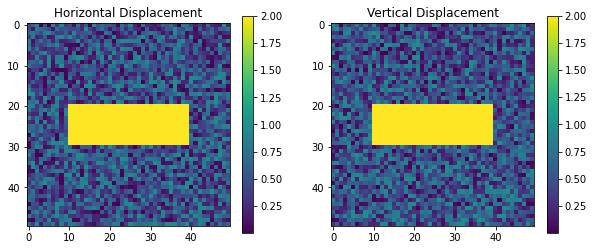

In [59]:
# Create sample displacement image with random noise
arr = np.random.rand(50,50,2)
arr[20:30,10:40,:] = 2
arr = arr.astype(np.float32)
print(f'Numpy array has shape {arr.shape}')

# View image
_, axs = plt.subplots(ncols=2,figsize=(10,4))
for idx in range(2):
    im = axs[idx].imshow(arr[:,:,idx])
    fig.colorbar(im,ax=axs[idx])
    
axs[0].set(title='Horizontal Displacement')
axs[1].set(title='Vertical Displacement')
plt.show()

In [61]:
# Create ITK vector image from numpy array
vector_image = itk.image_from_array(arr, is_vector=True)
assert vector_image.GetVectorLength() == 2

# Cast to itk.Image
image_type = itk.Image[itk.Vector[itk.F,2],2]
image = itk.cast_image_filter(vector_image, 
                              ttype=[type(vector_image), image_type])

# Apply relevant spatial properties. Here we arbitrarily set spacing and origin.
image.SetSpacing([0.1,0.2])
image.SetOrigin([1,1])

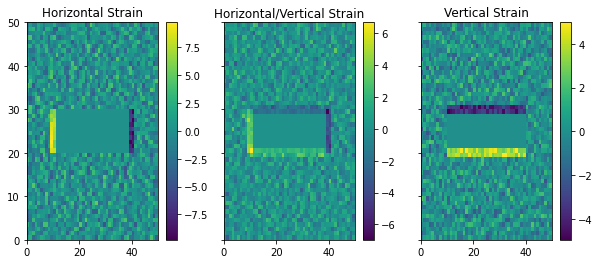

In [65]:
# Generate ITK strain image from ITK vector image
vector_type = itk.template(image)[1][0]
real_type = itk.template(vector_type)[1][0]

# Functional interface is not supported for StrainImageFilter so we define a filter object.
strain_filter = itk.StrainImageFilter[type(image),real_type,real_type].New()
strain_filter.SetInput(image)
strain_filter.Update()
strain_image = strain_filter.GetOutput()

# Create numpy array from ITK image
strain_array = itk.array_view_from_image(strain_image)

# View strain
fig, axs = plt.subplots(ncols=3,figsize=(10,4),sharey=True)
for idx in range(3):
    im = axs[idx].pcolormesh(strain_array[:,:,idx])
    fig.colorbar(im, ax=axs[idx])
    
axs[0].set(title='Horizontal Strain')
axs[1].set(title='Horizontal/Vertical Strain')
axs[2].set(title='Vertical Strain')
plt.show()